# Diabetes Dataset with Logistic Regression

## What is Logistic Regression?
Logistic Regression is used in the classification of numerical or catagorical data. The result of the dependent variable can only have 2 different values, for example yes / no, 1/0, female / male.
Now, let's use logistic regression, one of scikit-learn's popular machine learning algorithms, to train our diabetes dataset.

## About Dataset

 In this dataset we have some parameters about Diabets. We will use this features for predict diabet disease.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df=pd.read_csv("W:\\jupyter\\diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [83]:
#df['Pregnancies'].max()

17

In [106]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,29.153420,155.548223,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,8.790942,85.021108,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,7.000000,14.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,25.000000,121.500000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.153420,155.548223,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# finding any missing values in a dataset

In [5]:
 #Assuming df is your DataFrame
# Check for missing values in each column
missing_values = df.isnull().sum()

# Check for missing values in each row                         # just for checking any null values are present ot not
rows_with_missing = df.isnull().any(axis=1).sum()

print("Missing values per column:")
print(missing_values)
print("\nRows with missing values:", rows_with_missing)

Missing values per column:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Rows with missing values: 0


# Data cleaning 

## ---> insuline and skinethisnkess contain null values which is nut possible replace it by mean values

In [90]:


# Calculate the mean of non-zero values in the 'Insulin' column
mean_insulin = df.loc[df['Insulin'] != 0, 'Insulin'].mean()

# Replace zero values in the 'Insulin' column with the calculated mean
df['Insulin'] = df['Insulin'].replace(0, mean_insulin)


In [95]:
# Calculate the mean of non-zero values in the 'SkinThickness' column
mean_skin_thickness = df.loc[df['SkinThickness'] != 0, 'SkinThickness'].mean()

# Replace zero values in the 'SkinThickness' column with the calculated mean
df['SkinThickness'] = df['SkinThickness'].replace(0, mean_skin_thickness)

In [98]:
df    # now its perfictly fill the values of non zero

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35.00000,155.548223,33.6,0.627,50,1
1,1,85,66,29.00000,155.548223,26.6,0.351,31,0
2,8,183,64,29.15342,155.548223,23.3,0.672,32,1
3,1,89,66,23.00000,94.000000,28.1,0.167,21,0
4,0,137,40,35.00000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48.00000,180.000000,32.9,0.171,63,0
764,2,122,70,27.00000,155.548223,36.8,0.340,27,0
765,5,121,72,23.00000,112.000000,26.2,0.245,30,0
766,1,126,60,29.15342,155.548223,30.1,0.349,47,1


# Data visualization

## ---> Now the data is clean we can visualize

## Histogram plots

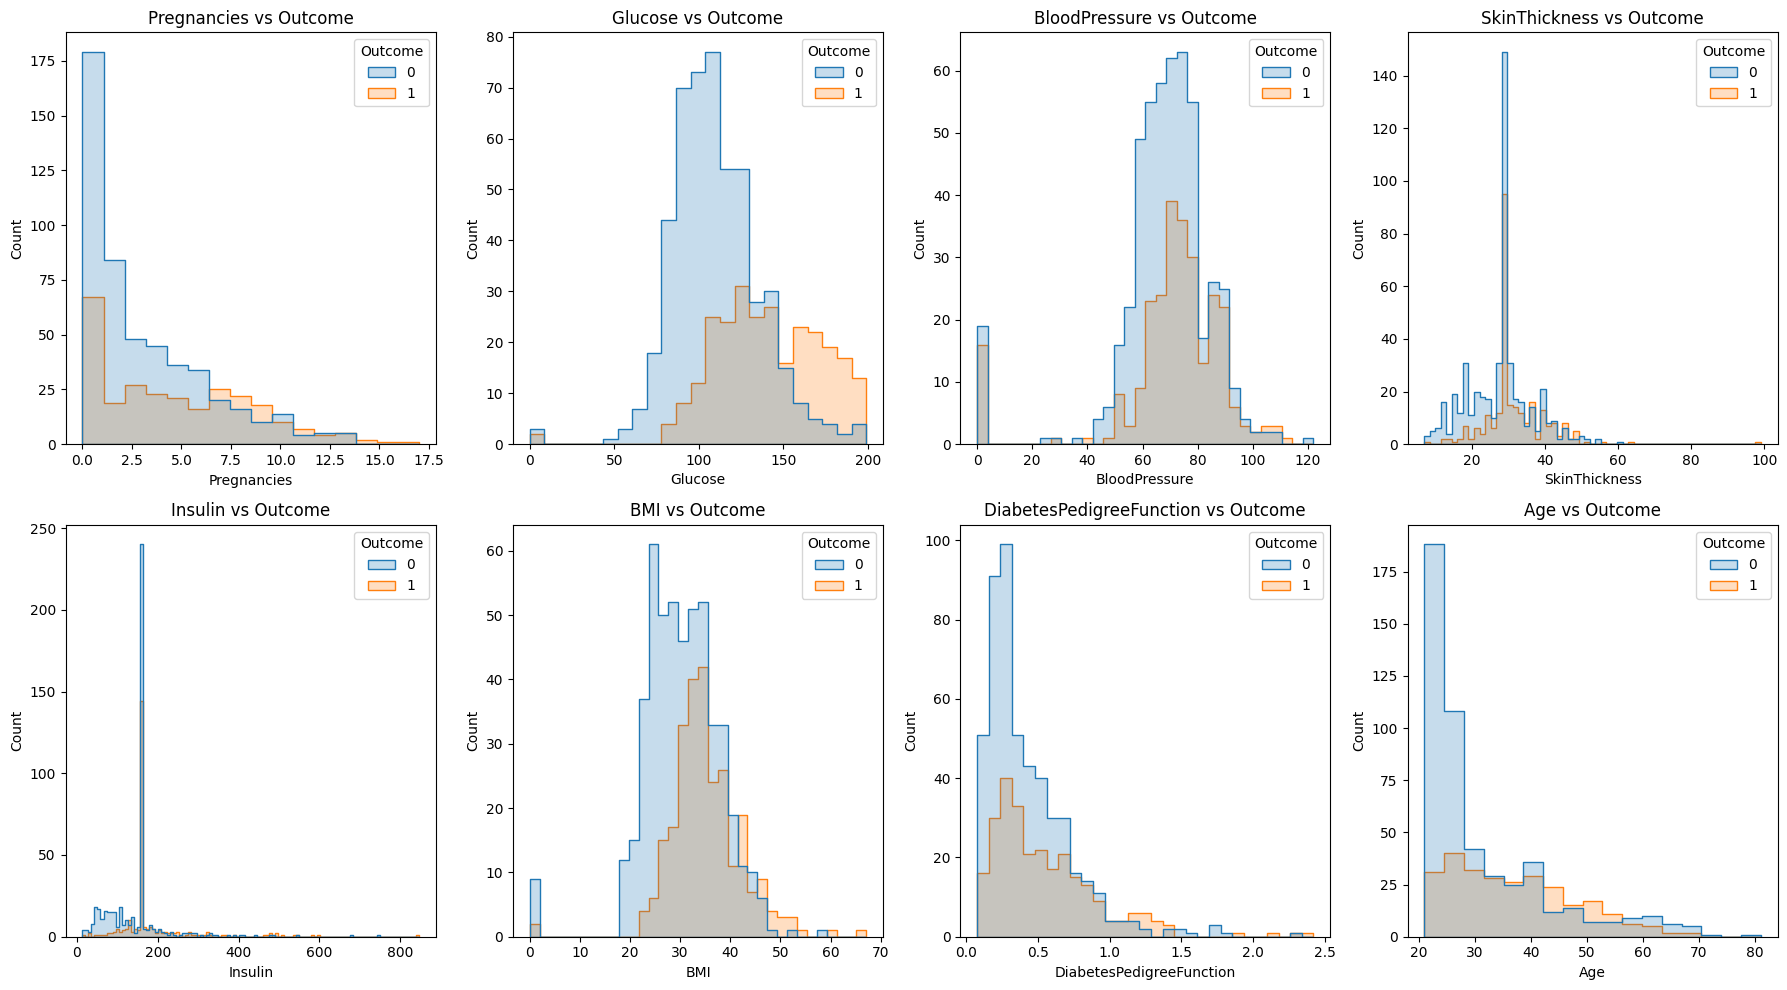

In [130]:
import matplotlib.pyplot as plt   # by histogram 
import seaborn as sns

# Set up the figure with subplots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(18, 10))

# Iterate through each column and plot
columns = df.columns[:-1]  # Exclude the 'Outcome' column
for i, column in enumerate(columns):
    sns.histplot(data=df, x=column, hue='Outcome', element='step', ax=axes[i//4, i%4])
    axes[i//4, i%4].set_title(f'{column} vs Outcome')

# Adjust layout
plt.tight_layout()
plt.show()


## Scatter plots

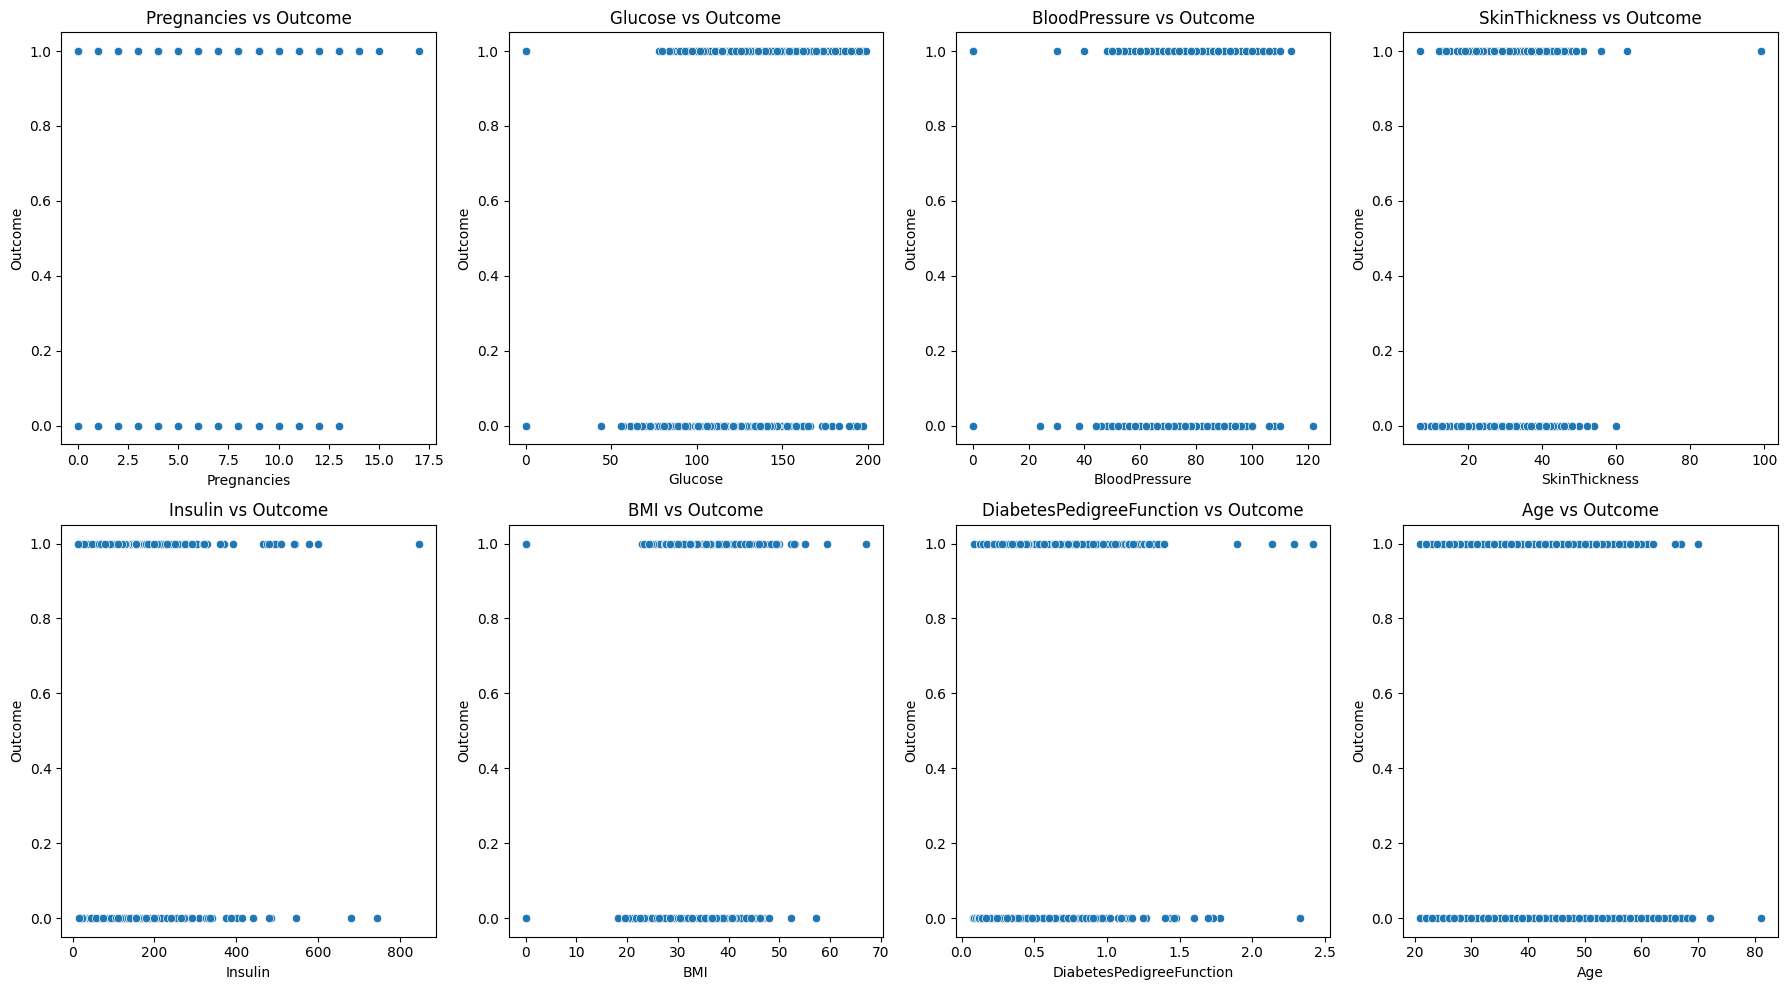

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns                        # by sactter plot 

# Set up the figure with subplots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(18, 10))

# Iterate through each column and plot
columns = df.columns[:-1]  # Exclude the 'Outcome' column
for i, column in enumerate(columns):
    sns.scatterplot(data=df, x=column, y='Outcome', ax=axes[i//4, i%4])
    axes[i//4, i%4].set_title(f'{column} vs Outcome')

# Adjust layout
plt.tight_layout()
plt.show()

In [100]:
df1=df.copy()

# correaltion concept
### -->Correlation: refers to the statistical relationship or association between two variables. It measures how much and in what way two variables ### change together.

### correlation is measure between (-1,+1):
### Positive correlation (+1): When one variable increases, the other tends to increase as well.
### Negative correlation (-1): When one variable increases, the other tends to decrease. 
### Zero correlation (0): There is no apparent relationship between the variables.)'''


# Select Features Based on Correlation:

### Choose features with the highest absolute correlation values with 'Outcome'. 
### These are likely to have a significant impact on predicting diabetes.
### Features with positive correlation values mean higher values are associated with higher chances of diabetes,
### while negative values suggest the opposit

In [101]:
import pandas as pd

# Assuming 'df' is your DataFrame containing the dataset
# Calculate correlation matrix
correlation_matrix = df1[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']].corr()

# Extract correlations with 'Outcome' column
correlations_with_outcome = correlation_matrix['Outcome'].abs().sort_values(ascending=False)

# Print correlations to see which features are most influential
print("Correlations with Outcome:")
print(correlations_with_outcome)

Correlations with Outcome:
Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
SkinThickness               0.215299
Insulin                     0.214411
DiabetesPedigreeFunction    0.173844
BloodPressure               0.065068
Name: Outcome, dtype: float64


#### ----> we have to atake only thos columns which have more high correlation

# Train the Model:
 ## ---> We used the the Logistic Algorithm to train the model

In [102]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Assuming 'df' is your DataFrame containing the dataset
# Select columns based on high correlation
selected_columns = ['Glucose', 'BMI','Age','DiabetesPedigreeFunction', 'Insulin']

# Create feature matrix (X) and target vector (y)
X = df1[selected_columns]
y = df1['Outcome']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize model (example: Logistic Regression)
model = LogisticRegression(max_iter=1000)

# Train the model
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

## ---> now compare the x_text and Y_text for clarification

In [134]:
# Convert y_test and y_pred to DataFrame for easier handling
y_test_df = pd.DataFrame(y_test).reset_index(drop=True)
y_pred_df = pd.DataFrame(y_pred, columns=['Predicted'])

# Combine the actual and predicted values into a single DataFrame
comparison_df = pd.concat([y_test_df, y_pred_df], axis=1)
comparison_df.columns = ['Actual', 'Predicted']

# Display the first few rows of the comparison DataFrame
print(comparison_df.head())

   Actual  Predicted
0       0          0
1       0          0
2       0          0
3       0          0
4       0          1


# Model Evaluation

In [136]:

classification_rep = classification_report(y_test, y_pred)

print(f'Classification Report:\n{classification_rep}')

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.84      0.82        99
           1       0.69      0.64      0.66        55

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.76      0.77      0.76       154



In [128]:
# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)   # is used to compute the accuracy of a classification model
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.77


# *=------>our model give about 77% percent accuracy**********

# Confusion Matrix Heatmap
### -->A confussion matric is N*N matrix which is used to describe the classification model ,where N is the number of target variable
### --->this compare the actual target values with predicted target values

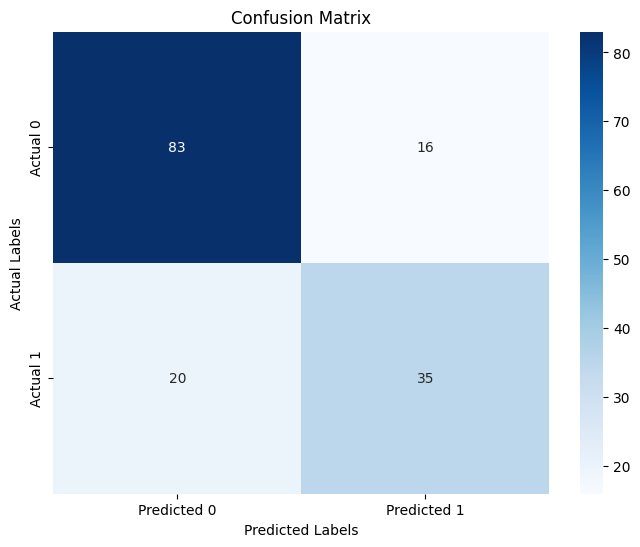

In [132]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')
plt.show()